In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
import json
import re

In [2]:
# I load the json file to be sure to import all elements without any error
data = pd.read_json('les-arbres.json', orient='records')

In [3]:
# I explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14322 entries, 0 to 14321
Data columns (total 5 columns):
datasetid           14322 non-null object
recordid            14322 non-null object
fields              14322 non-null object
geometry            14322 non-null object
record_timestamp    14322 non-null object
dtypes: object(5)
memory usage: 559.6+ KB


In [4]:
# I look at the types of features
data.dtypes

datasetid           object
recordid            object
fields              object
geometry            object
record_timestamp    object
dtype: object

In [5]:
# I look at nan values
data.isnull().sum()

datasetid           0
recordid            0
fields              0
geometry            0
record_timestamp    0
dtype: int64

In [6]:
# I display some rows of the dataset
data.tail()

,datasetid,recordid,fields,geometry,record_timestamp
14317,les-arbres,b595294b352f8808e56a27eae64b7fd5a2932f06,"{'libellefrancais': 'Marronnier', 'idemplaceme...","{'type': 'Point', 'coordinates': [2.3793102616...",2019-11-08T10:01:20.116+01:00
14318,les-arbres,37639fed2bf810835c5340e5ae9d289f82a6d778,"{'libellefrancais': 'Platane', 'idemplacement'...","{'type': 'Point', 'coordinates': [2.3915097401...",2019-11-08T10:01:20.116+01:00
14319,les-arbres,250a1ffb5c10b80f8a3f2e71391e0f0fd2540361,"{'libellefrancais': 'Platane', 'idemplacement'...","{'type': 'Point', 'coordinates': [2.3910116630...",2019-11-08T10:01:20.116+01:00
14320,les-arbres,9c489ffd9f15d89d613809e148b04535305ee175,"{'libellefrancais': 'Peuplier', 'idemplacement...","{'type': 'Point', 'coordinates': [2.3847010452...",2019-11-08T10:01:20.116+01:00
14321,les-arbres,770ef66ad0eac69de0b2895c8178feea8a849d78,"{'libellefrancais': 'Platane', 'idemplacement'...","{'type': 'Point', 'coordinates': [2.3813920073...",2019-11-08T10:01:20.116+01:00


In [7]:
# I look at the numbers of rows and columns
data.shape

(14322, 5)

In [8]:
from pandas.io.json import json_normalize

# I parse the 'fields' feature where all data are stored
trees = json_normalize(data['fields'])
trees.head()

,libellefrancais,idemplacement,domanialite,circonferenceencm,hauteurenm,espece,adresse,geo_point_2d,arrondissement,stadedeveloppement,remarquable,idbase,genre,typeemplacement,varieteoucultivar,complementadresse
0,Platane,000101007,Alignement,35.0,5.0,x hispanica,BOULEVARD MACDONALD,"[48.8966273942, 2.39279835434]",PARIS 19E ARRDT,J,0,2008523.0,Platanus,Arbre,NaN,NaN
1,Cerisier à fleurs,M0840005,Jardin,80.0,6.0,sargentii,PARC DES BUTTES CHAUMONT,"[48.879291788, 2.382417251949999]",PARIS 19E ARRDT,NaN,NaN,103169.0,Prunus,Arbre,NaN,NaN
2,Erable,000104008,Alignement,35.0,4.0,campestre,JARDINIERES DU QUAI DU LOT / QUAI DU LOT,"[48.8997481873, 2.38110864573]",PARIS 19E ARRDT,J,0,2027978.0,Acer,Arbre,NaN,NaN
3,If,F0300034,Jardin,70.0,0.0,baccata,PARC DES BUTTES CHAUMONT,"[48.8818654713, 2.38473721565]",PARIS 19E ARRDT,NaN,NaN,103289.0,Taxus,Arbre,NaN,NaN
4,Tilleul,00000071,Jardin,105.0,0.0,x europaea,JARDIN ILOT RIQUET,"[48.8898949051, 2.37264376961]",PARIS 19E ARRDT,NaN,NaN,139834.0,Tilia,Arbre,''Euchlora'',NaN


In [9]:
# I look at the types of features
trees.dtypes

libellefrancais        object
idemplacement          object
domanialite            object
circonferenceencm     float64
hauteurenm            float64
espece                 object
adresse                object
geo_point_2d           object
arrondissement         object
stadedeveloppement     object
remarquable            object
idbase                float64
genre                  object
typeemplacement        object
varieteoucultivar      object
complementadresse      object
dtype: object

In [10]:
# I look at nan values
trees.isnull().sum()

libellefrancais          87
idemplacement             0
domanialite               0
circonferenceencm         0
hauteurenm                0
espece                  140
adresse                   0
geo_point_2d              0
arrondissement            0
stadedeveloppement     4897
remarquable            3612
idbase                    0
genre                     0
typeemplacement           0
varieteoucultivar     11789
complementadresse     13283
dtype: int64

In [11]:
#I drop columns with less than 10% of values
trees.drop(columns = ['varieteoucultivar',  'complementadresse'], axis = 1, inplace = True)

In [12]:
#I drop rows with nan values
trees.dropna(subset=['libellefrancais', 'espece', 'stadedeveloppement', 'remarquable'], inplace = True)

In [13]:
# I check if the dataset has no more nan values
trees.isna().sum()

libellefrancais       0
idemplacement         0
domanialite           0
circonferenceencm     0
hauteurenm            0
espece                0
adresse               0
geo_point_2d          0
arrondissement        0
stadedeveloppement    0
remarquable           0
idbase                0
genre                 0
typeemplacement       0
dtype: int64

In [14]:
print(trees.typeemplacement.value_counts())
print(trees.arrondissement.value_counts())

Arbre    9249
Name: typeemplacement, dtype: int64
PARIS 19E ARRDT    9249
Name: arrondissement, dtype: int64


In [15]:
#I drop columns with same values in or id values
trees.drop(columns = ['arrondissement','typeemplacement', 'idemplacement'], axis = 1, inplace = True)

In [16]:
# For those features, I create a list with values appearing more than 2 times 
col = ['libellefrancais','domanialite','circonferenceencm', 'hauteurenm', 'espece']
values = []
for c in col:
    values.append(list(trees[c].value_counts()[trees[c].value_counts() > 2].index))
    
# I only keep features with the values appearing more than 2 times 
for i in range(len(values)):
    trees = trees[trees[col[i]].isin(values[i])]

In [17]:
#autre façon plus "pythonique" de faire :
#values2 = [list(trees[c].value_counts()[trees[c].value_counts() > 3].index) for c in col]
#values2 == values

In [18]:
# I drop those features that I consider non relevant for the modeling process
trees.drop(columns = ['remarquable', 'genre','idbase', 'adresse'], axis =1, inplace  = True)

In [19]:
# I look at 'n. sp.' values (equivalent of nan values)
# trees.eq('n. sp.').sum()

In [20]:
# I drop all rows with 
# trees = trees[trees.espece != 'n. sp.']

In [21]:
#len(trees.libellefrancais.unique())

In [22]:
# I create 2 features to collect coordinates values from the 'geo_point_2d' feature
latitude = []
longitude = []

for val in trees.geo_point_2d:
    lat = val.pop(0)
    lon = val.pop(0)
    latitude.append(lat)
    longitude.append(lon)

In [23]:
#print(latitude)
#print(longitude)

In [24]:
# I can now assign the list to the columns values
trees['latitude'] = latitude
trees['longitude'] = longitude

In [25]:
trees.drop(columns = ['geo_point_2d'], axis = 1, inplace = True)

In [26]:
trees.head()

,libellefrancais,domanialite,circonferenceencm,hauteurenm,espece,stadedeveloppement,latitude,longitude
0,Platane,Alignement,35.0,5.0,x hispanica,J,48.896627,2.392798
2,Erable,Alignement,35.0,4.0,campestre,J,48.899748,2.381109
5,Tilleul,DASCO,45.0,5.0,n. sp.,J,48.884806,2.390669
7,Marronnier,Alignement,75.0,10.0,x carnea,JA,48.896341,2.378369
10,Erable,Alignement,120.0,10.0,pseudoplatanus,A,48.890593,2.399003


# From here, the dataset can be prepared in different ways

In [27]:
# I prepare the dataset by getting dummies of 2 features
trees = pd.get_dummies(data=trees, columns=['stadedeveloppement', 'domanialite'], drop_first= False)
trees

,libellefrancais,circonferenceencm,hauteurenm,espece,latitude,longitude,stadedeveloppement_A,stadedeveloppement_J,stadedeveloppement_JA,stadedeveloppement_M,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
0,Platane,35.0,5.0,x hispanica,48.896627,2.392798,0,1,0,0,1,0,0,0,0,0
2,Erable,35.0,4.0,campestre,48.899748,2.381109,0,1,0,0,1,0,0,0,0,0
5,Tilleul,45.0,5.0,n. sp.,48.884806,2.390669,0,1,0,0,0,1,0,0,0,0
7,Marronnier,75.0,10.0,x carnea,48.896341,2.378369,0,0,1,0,1,0,0,0,0,0
10,Erable,120.0,10.0,pseudoplatanus,48.890593,2.399003,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,Marronnier,150.0,15.0,hippocastanum,48.889867,2.379310,1,0,0,0,0,1,0,0,0,0
14318,Platane,100.0,15.0,n. sp.,48.888527,2.391510,1,0,0,0,1,0,0,0,0,0
14319,Platane,150.0,20.0,x hispanica,48.884311,2.391012,1,0,0,0,1,0,0,0,0,0
14320,Peuplier,170.0,18.0,x canadensis,48.895184,2.384701,1,0,0,0,1,0,0,0,0,0


In [28]:
# I look at features names for further actions on features
trees.columns

Index(['libellefrancais', 'circonferenceencm', 'hauteurenm', 'espece',
       'latitude', 'longitude', 'stadedeveloppement_A', 'stadedeveloppement_J',
       'stadedeveloppement_JA', 'stadedeveloppement_M',
       'domanialite_Alignement', 'domanialite_DASCO', 'domanialite_DFPE',
       'domanialite_DJS', 'domanialite_Jardin', 'domanialite_PERIPHERIQUE'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F36A5DA748>,
      dtype=object)

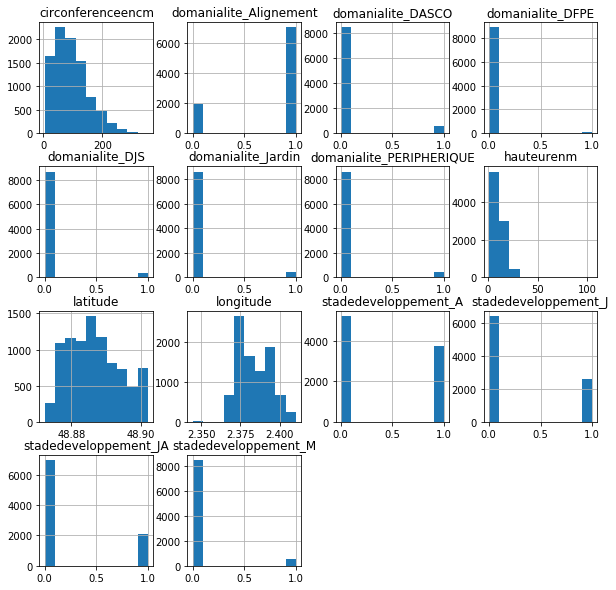

In [29]:
# I visualize the distribution of numeric series
trees.hist(figsize=(10,10))

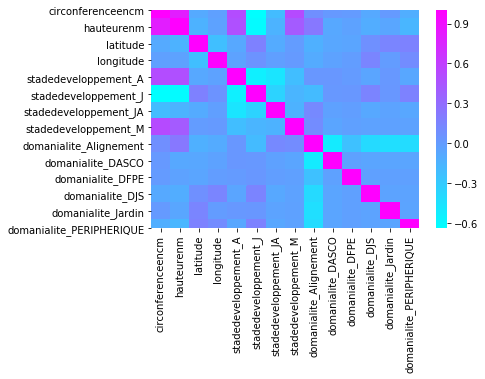

In [30]:
# I visualize the correlation between those features
sns.heatmap(trees.corr(), cmap = 'cool')

In [31]:
display(trees)

,libellefrancais,circonferenceencm,hauteurenm,espece,latitude,longitude,stadedeveloppement_A,stadedeveloppement_J,stadedeveloppement_JA,stadedeveloppement_M,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
0,Platane,35.0,5.0,x hispanica,48.896627,2.392798,0,1,0,0,1,0,0,0,0,0
2,Erable,35.0,4.0,campestre,48.899748,2.381109,0,1,0,0,1,0,0,0,0,0
5,Tilleul,45.0,5.0,n. sp.,48.884806,2.390669,0,1,0,0,0,1,0,0,0,0
7,Marronnier,75.0,10.0,x carnea,48.896341,2.378369,0,0,1,0,1,0,0,0,0,0
10,Erable,120.0,10.0,pseudoplatanus,48.890593,2.399003,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,Marronnier,150.0,15.0,hippocastanum,48.889867,2.379310,1,0,0,0,0,1,0,0,0,0
14318,Platane,100.0,15.0,n. sp.,48.888527,2.391510,1,0,0,0,1,0,0,0,0,0
14319,Platane,150.0,20.0,x hispanica,48.884311,2.391012,1,0,0,0,1,0,0,0,0,0
14320,Peuplier,170.0,18.0,x canadensis,48.895184,2.384701,1,0,0,0,1,0,0,0,0,0


In [32]:
# I focus on the numeric series by assigning the X dataset 
X = trees.drop(columns = ['libellefrancais','espece'])

In [33]:
# I check the types of values of X to be sure all are numeric
X.dtypes

circonferenceencm           float64
hauteurenm                  float64
latitude                    float64
longitude                   float64
stadedeveloppement_A          uint8
stadedeveloppement_J          uint8
stadedeveloppement_JA         uint8
stadedeveloppement_M          uint8
domanialite_Alignement        uint8
domanialite_DASCO             uint8
domanialite_DFPE              uint8
domanialite_DJS               uint8
domanialite_Jardin            uint8
domanialite_PERIPHERIQUE      uint8
dtype: object

In [34]:
#Diverse value ranges in different features could cause issues in our clustering. 
#The way to reduce the problem is through feature scaling. 

from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(X)
trees_scale = stscaler.transform(X)

In [35]:
display(trees_scale[0])

array([-1.03942263, -1.0073054 ,  1.35415543,  0.86826838, -0.84834871,
        1.56837525, -0.54900937, -0.25456825,  0.52951964, -0.2688106 ,
       -0.12452855, -0.2100865 , -0.2262314 , -0.21800278])

# Modelling on the X set

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8)
trees_kmeans = kmeans.fit(trees_scale)
trees['labels'] = trees_kmeans.labels_
trees['labels'].value_counts(ascending = True)

6     380
3     407
7     433
5     542
4     605
2    1757
0    1844
1    3069
Name: labels, dtype: int64

In [37]:
trees.groupby("labels").mean()

,circonferenceencm,hauteurenm,latitude,longitude,stadedeveloppement_A,stadedeveloppement_J,stadedeveloppement_JA,stadedeveloppement_M,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
labels,,,,,,,,,,,,,,
0,71.554772,9.772234,48.885198,2.383139,0.000000,0.000000,1.000000,0.000000,0.986985,0.00000,0.013015,0.00000,0.000000,0.000000
1,123.102313,15.251222,48.885580,2.383096,1.000000,0.000000,0.000000,0.000000,0.980775,0.00000,0.019225,0.00000,0.000000,0.000000
2,37.854297,5.491178,48.887483,2.383717,0.000000,1.000000,0.000000,0.000000,0.969266,0.00000,0.030734,0.00000,0.000000,0.000000
3,61.550369,6.312039,48.892262,2.388588,0.257985,0.636364,0.098280,0.007371,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
4,95.105785,9.368595,48.884647,2.382489,0.482645,0.332231,0.185124,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000
5,205.719557,22.033210,48.886740,2.384229,0.003690,0.000000,0.001845,0.994465,0.968635,0.00738,0.001845,0.00369,0.012915,0.005535
6,69.184211,8.018421,48.889213,2.391190,0.286842,0.626316,0.078947,0.007895,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000
7,91.237875,9.307159,48.891485,2.383806,0.473441,0.362587,0.152425,0.011547,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000


In [38]:
kmeans = KMeans(n_clusters = 6)
trees_kmeans = kmeans.fit(trees_scale)
trees['labels'] = trees_kmeans.labels_
trees['labels'].value_counts(ascending = True)

5     407
0     550
4     605
2    1940
3    2152
1    3383
Name: labels, dtype: int64

In [39]:
trees.groupby("labels").mean()

,circonferenceencm,hauteurenm,latitude,longitude,stadedeveloppement_A,stadedeveloppement_J,stadedeveloppement_JA,stadedeveloppement_M,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
labels,,,,,,,,,,,,,,
0,205.654545,21.927273,48.886690,2.384268,0.003636,0.000000,0.001818,0.994545,0.954545,0.007273,0.001818,0.009091,0.021818,0.005455
1,124.620455,15.083062,48.885911,2.383272,1.000000,0.000000,0.000000,0.000000,0.889743,0.000000,0.017440,0.032220,0.060597,0.000000
2,71.533505,9.683505,48.885233,2.383485,0.000000,0.000000,1.000000,0.000000,0.938144,0.000000,0.012371,0.015464,0.034021,0.000000
3,37.210967,5.400093,48.888437,2.384571,0.000000,1.000000,0.000000,0.000000,0.791357,0.000000,0.025093,0.110595,0.072955,0.000000
4,95.105785,9.368595,48.884647,2.382489,0.482645,0.332231,0.185124,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5,61.550369,6.312039,48.892262,2.388588,0.257985,0.636364,0.098280,0.007371,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [40]:
kmeans = KMeans(n_clusters = 4)
trees_kmeans = kmeans.fit(trees_scale)
trees['labels'] = trees_kmeans.labels_
trees['labels'].value_counts(ascending = True)

3     553
2    2092
0    2616
1    3776
Name: labels, dtype: int64

In [41]:
trees.groupby("labels").mean()

,circonferenceencm,hauteurenm,latitude,longitude,stadedeveloppement_A,stadedeveloppement_J,stadedeveloppement_JA,stadedeveloppement_M,domanialite_Alignement,domanialite_DASCO,domanialite_DFPE,domanialite_DJS,domanialite_Jardin,domanialite_PERIPHERIQUE
labels,,,,,,,,,,,,,,
0,37.203746,5.326835,48.888653,2.384732,0.001529,0.998471,0.000000,0.000000,0.650994,0.076835,0.020642,0.090979,0.060015,0.100535
1,125.743379,14.769333,48.885901,2.383428,1.000000,0.000000,0.000000,0.000000,0.797140,0.077331,0.015625,0.028867,0.054290,0.026748
2,71.855641,9.524379,48.885337,2.383489,0.000000,0.000000,1.000000,0.000000,0.869981,0.053537,0.011472,0.014340,0.031549,0.019120
3,205.587703,21.882459,48.886699,2.384325,0.003617,0.000000,0.001808,0.994575,0.949367,0.007233,0.001808,0.009042,0.021700,0.010850


In [42]:
# I check number of values in 'stadedeveloppement_M' feature labelled as 0
trees.stadedeveloppement_M[trees.labels == 0].value_counts()

0    2616
Name: stadedeveloppement_M, dtype: int64

In [43]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, trees.labels, metric='euclidean')
print('The silhouette score with KMeans model is', score)

The silhouette score with KMeans model is 0.2361669019227633


In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8)
trees_dbscan = dbscan.fit(trees_scale)
trees['labels_DBSCAN'] = trees_dbscan.labels_
trees['labels_DBSCAN'].value_counts(ascending = True)

 10       5
 58       5
 62       5
 57       5
 61       5
       ... 
-1      217
 4      458
 0     1689
 2     1768
 3     3000
Name: labels_DBSCAN, Length: 64, dtype: int64

In [45]:
score = silhouette_score(X, trees.labels_DBSCAN, metric='euclidean')
print('The silhouette score with DBSCAN model is', score)

The silhouette score with DBSCAN model is -0.5414638313346221


In [46]:
#trees.groupby("labels_DBSCAN").mean()

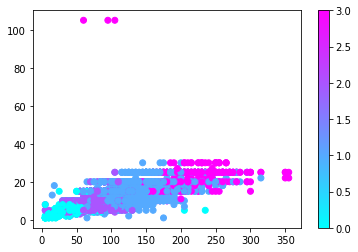

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(trees['circonferenceencm'], trees['hauteurenm'], c= trees['labels'], cmap = 'cool')
plt.colorbar(scatter)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F301062848>],
      dtype=object)

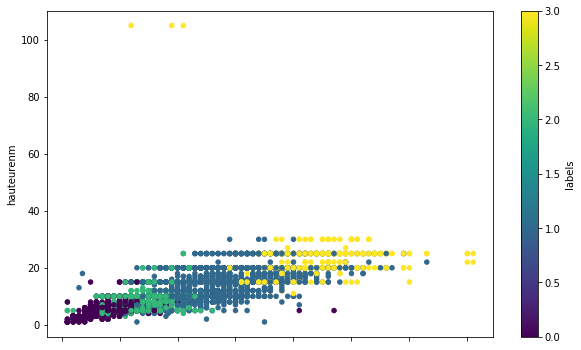

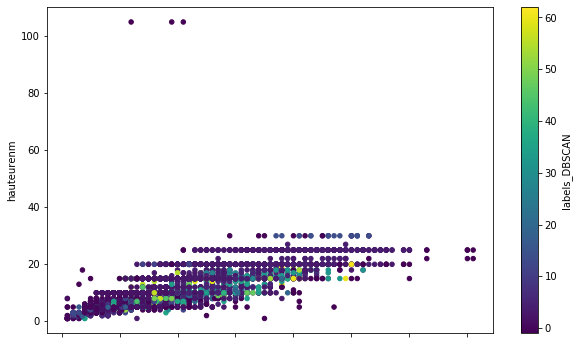

In [48]:
trees.plot.scatter(subplots=True, figsize=(10, 6), x="circonferenceencm", y="hauteurenm", c="labels", colormap="viridis")
trees.plot.scatter(subplots=True, figsize=(10, 6), x="circonferenceencm", y="hauteurenm", c="labels_DBSCAN", colormap="viridis")

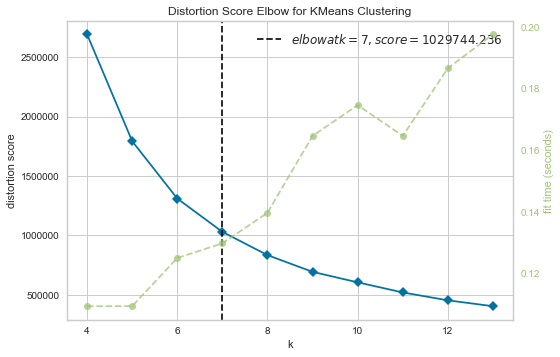

In [49]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,14))
visualizer.fit(X)
visualizer.poof()

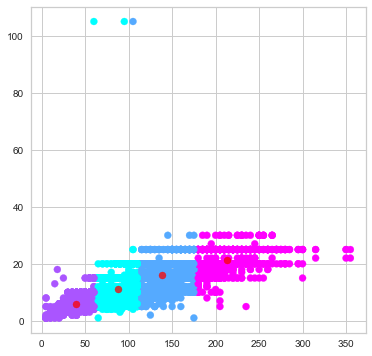

In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#X, _ = make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X['circonferenceencm'], X['hauteurenm'], c=y_pred, cmap = 'cool')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)

plt.show()

In [51]:
"""#from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

#X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()
"""

"#from sklearn.datasets import make_blobs\nfrom mpl_toolkits.mplot3d import Axes3D\nfrom scipy.spatial.transform import Rotation as R\n\n#X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0)\n\nX = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]\n\nrot = R.from_euler('y', 45, degrees=True)\nX = rot.apply(X)\n\nfig = plt.figure(figsize=(8, 8))\nax = fig.gca(projection='3d')\n\nax.scatter(X[:, 0], X[:, 1], X[:, 2])\nax.set_xlim(-7, 7)\nax.set_ylim(-7, 7)\nax.set_zlim(-7, 7)\n\nax.view_init(elev=20, azim=65)\nplt.show()\n"

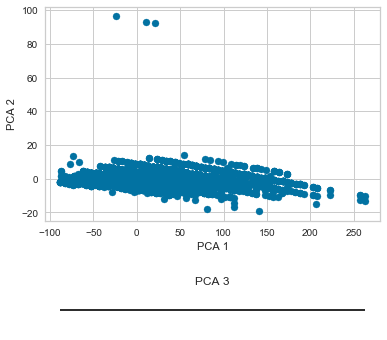

In [52]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=2)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()



In [53]:
#trees.to_csv(r'../trees.csv')

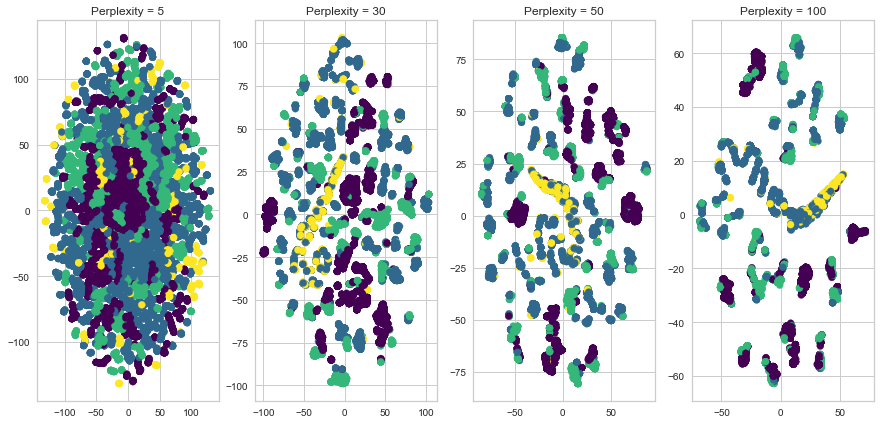

In [54]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=trees['labels'], cmap = 'viridis')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()
